# Analyzing Titanic Dataset Using Different Classification Models

<b>First, let's import necessary libraries.</b>

In [183]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

<b>Then let's read train set and test set.</b>

In [184]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [185]:
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [186]:
train_data.shape

(891, 12)

<b>We take a look at training data set. We see our numerical and categorical values.</b><br>
<b>I'm going to explain some features in the data set to get to know our data set better.</b><br><br>



<table border="1">

 <tr>
 
  <th>Feature</th>
  <th>Meaning</th>
  
 </tr>
 
 <tr>
 
  <td>Pclass</td>
  <td>Ticket class</td>
  
 </tr>
 
 <tr>
 
  <td>SibSp</td>
  <td># of siblings / spouses aboard the Titanic</td>
  
 </tr>
    
  <tr>
 
  <td>Parch</td>
  <td># of parents / children aboard the Titanic</td>
  
 </tr>
     
  <tr>
 
  <td>Ticket</td>
  <td>Ticket number</td>
  
 </tr>
        
  <tr>
 
  <td>Fare</td>
  <td>Passenger fee</td>
  
 </tr>
     <tr>
 
  <td>Cabin</td>
  <td>Cabin number</td>
  
 </tr>
     <tr>
 
  <td>Embarked</td>
  <td>Port of Embarkation</td>
  
 </tr>
</table>

In [187]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<b>Look at the number of missing values.</b>

In [189]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [190]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [191]:
print('Kayıp yaş oranı %.2f%%' %((train_data['Age'].isnull().sum()/train_data.shape[0])*100))

Kayıp yaş oranı 19.87%


In [192]:
print('Kayıp kabin no oranı %.2f%%' %((train_data['Cabin'].isnull().sum()/train_data.shape[0])*100))

Kayıp kabin no oranı 77.10%


In [193]:
print('Kayıp binilen liman adı %.2f%%' %((train_data['Embarked'].isnull().sum()/train_data.shape[0])*100))

Kayıp binilen liman adı 0.22%


<b>Let's examine embarked column.</b><br>
<b>The number of passengers getting from S port is higher than others.</b>

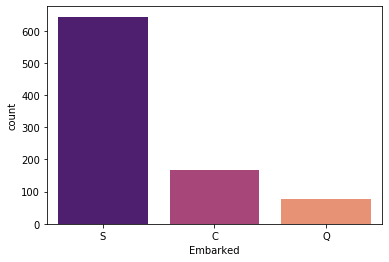

In [194]:
sns.countplot(x='Embarked', palette="magma", data=train_data)
plt.show()

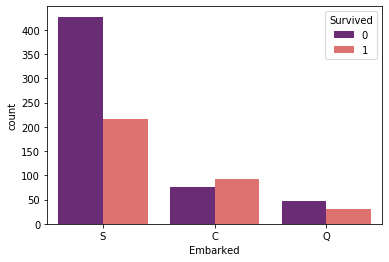

In [195]:
sns.countplot(train_data['Embarked'], hue=train_data['Survived'], palette="magma")

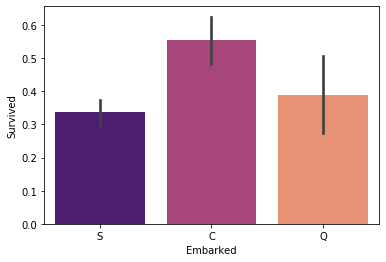

In [196]:
sns.barplot('Embarked', 'Survived', palette="magma", data=train_data)
plt.show()

<b>The survival rate of passengers boarding at port C is quite high. While the number of passengers boarding from the S port is the highest, the most death is here.</b>

<b>We fill in the lost values according to the most preferred port. So with S.</b>

In [197]:
train_data['Embarked'] = train_data['Embarked'].fillna("S")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [198]:
train_data.groupby(['Embarked']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.517028,0.339009,2.346749,29.519335,0.569659,0.411765,27.243651


<b>Now the graphic above has become meaningful. We see that people boarding at port C pay the highest fare, with the highest survival rate. The most crowded port S but survival probability of C have more than others.</b>

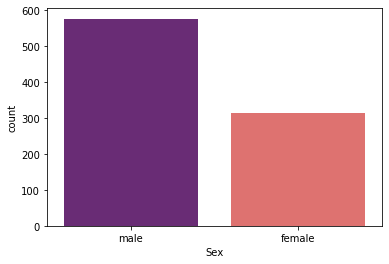

In [199]:
sns.countplot(x='Sex', data=train_data, palette="magma")
plt.show()

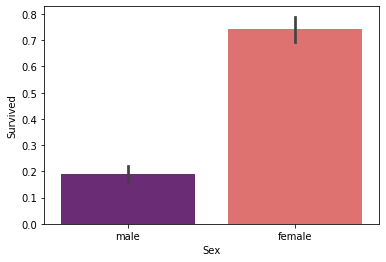

In [200]:
sns.barplot(data=train_data, x='Sex', y='Survived', palette="magma")
plt.show()

<b>We see that most of survivors are women. Actually, there is a evident difference.</b>

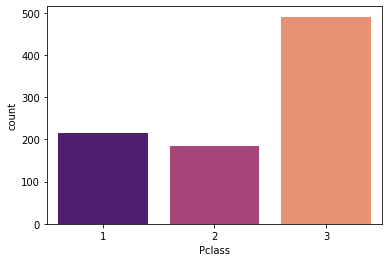

In [201]:
sns.countplot(x='Pclass', data=train_data, palette="magma")
plt.show()

<b>Now, we examine Pclass colums.</b><br>
<b>We see that most crowded ticket class is 3.</b>

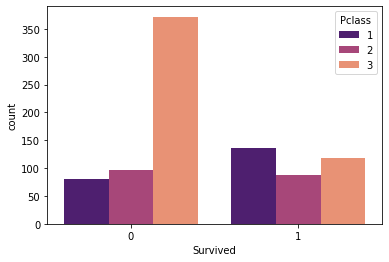

In [202]:
sns.countplot(x='Survived', hue='Pclass', palette="magma", data=train_data)

<b>But how many survive according to the ticket classes?</b><br>
<b>As it seems, the most crowded and cheapest class 3 is the one with the highest number of deaths.</b><br><br>
<b>1: survived</b><br>
<b>0: died</b>

<b>Another column with missing values is age column.</b><br>
<b>We find the average age value and replace it with missing data.</b><br>
<b>Since it will be a float value, we finally rounded the value using round() function.</b>

In [203]:
age_mean = train_data['Age'].mean()
train_data['Age'] = train_data['Age'].replace(np.nan, age_mean)
train_data['Age'] = train_data['Age'].round()

<b>While doing data analysis, every column may not be necessary for us.</b><br>
<b>Also, not removing the columns that are not required for analysis may distort our results.</b><br>
<b>There were many missing values in the cabin column. We cannot fill in so many missing values. This changes our results considerably. If we do, we can skew the result.</b>

In [204]:
d = ['PassengerId','Name','Ticket','Cabin']
train_data = train_data.drop(d, axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [205]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<b>This is one-hot encoding part.</b><br>
<b>Sex and embarked columns consist of categorical variables.</b><br>
<b>To convert categorical variables into numerical variables, we will use .get_dummies () function of Pandas for this case.</b>

In [206]:
embarked = pd.get_dummies(train_data['Embarked'], drop_first = True)
train_data = pd.concat([train_data, embarked], axis = 1)
train_data.drop(['Embarked'] , axis = 1 , inplace = True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,male,22.0,1,0,7.2500,0,1
1,1,1,female,38.0,1,0,71.2833,0,0
2,1,3,female,26.0,0,0,7.9250,0,1
3,1,1,female,35.0,1,0,53.1000,0,1
4,0,3,male,35.0,0,0,8.0500,0,1


In [207]:
sex = pd.get_dummies(train_data['Sex'], drop_first = True)
train_data = pd.concat([train_data, sex], axis = 1)
train_data.drop(['Sex'] , axis = 1 , inplace = True)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


<b>We can convert the SibSp and Parch columns into one column. Thus, we can get a better data set.</b><br>
<b>I collect the SibSp and Parch column as TravelAlone in one column.</b><br>
<b>The SibSp and Parch column meant things like spouse, parent, child accompanying the journey.</b>

In [208]:
train_data['TravelAlone'] = np.where((train_data['SibSp'] + train_data['Parch'])> 0, 0, 1)

In [209]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male,TravelAlone
0,0,3,22.0,1,0,7.2500,0,1,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0
4,0,3,35.0,0,0,8.0500,0,1,1,1


In [210]:
train_data = train_data.drop(['SibSp','Parch'], axis=1)
train_data.head()

,Survived,Pclass,Age,Fare,Q,S,male,TravelAlone
0,0,3,22.0,7.2500,0,1,1,0
1,1,1,38.0,71.2833,0,0,0,0
2,1,3,26.0,7.9250,0,1,0,1
3,1,1,35.0,53.1000,0,1,0,0
4,0,3,35.0,8.0500,0,1,1,1


<b>Let's do the same for the test set.</b>

In [211]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [212]:
test_data['Age'] = train_data['Age'].replace(np.nan, age_mean)
test_data['Age'] = test_data['Age'].round()

In [213]:
fare_median = test_data['Fare'].median(skipna=True)
test_data['Fare'] = test_data['Fare'].replace(np.nan, fare_median)

<b>We found that there was too much missing value in the cabin column. If we complete this missing data, we probably distort our result.</b><br>
<b>Therefore, we are removing this column.</b>

In [214]:
test_data = test_data.drop('Cabin', axis=1)

In [215]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [216]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,35.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,3101298,12.2875,S


In [217]:
embarked = pd.get_dummies(test_data['Embarked'], drop_first = True)
test_data = pd.concat([test_data, embarked], axis = 1)
test_data.drop(['Embarked'] , axis = 1 , inplace = True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.8292,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,7.0000,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,240276,9.6875,1,0
3,895,3,"Wirz, Mr. Albert",male,35.0,0,0,315154,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,3101298,12.2875,0,1


In [218]:
sex = pd.get_dummies(test_data['Sex'], drop_first = True)
test_data = pd.concat([test_data, sex], axis = 1)
test_data.drop(['Sex'] , axis = 1 , inplace = True)
test_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Q,S,male
0,892,3,"Kelly, Mr. James",22.0,0,0,330911,7.8292,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",38.0,1,0,363272,7.0000,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",26.0,0,0,240276,9.6875,1,0,1
3,895,3,"Wirz, Mr. Albert",35.0,0,0,315154,8.6625,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",35.0,1,1,3101298,12.2875,0,1,0


In [219]:
test_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Q,S,male
0,892,3,"Kelly, Mr. James",22.0,0,0,330911,7.8292,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",38.0,1,0,363272,7.0000,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",26.0,0,0,240276,9.6875,1,0,1
3,895,3,"Wirz, Mr. Albert",35.0,0,0,315154,8.6625,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",35.0,1,1,3101298,12.2875,0,1,0


In [220]:
test_data['TravelAlone'] = np.where((test_data['SibSp']+test_data['Parch'])>0, 0, 1)
test_data = test_data.drop(['SibSp','Parch'], axis=1)

In [221]:
test_data.head()

,PassengerId,Pclass,Name,Age,Ticket,Fare,Q,S,male,TravelAlone
0,892,3,"Kelly, Mr. James",22.0,330911,7.8292,1,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",38.0,363272,7.0000,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",26.0,240276,9.6875,1,0,1,1
3,895,3,"Wirz, Mr. Albert",35.0,315154,8.6625,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",35.0,3101298,12.2875,0,1,0,0


<b>Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe.</b>

In [222]:
train_data.corr()

,Survived,Pclass,Age,Fare,Q,S,male,TravelAlone
Survived,1.000000,-0.338481,-0.070324,0.257307,0.003650,-0.149683,-0.543351,-0.203367
Pclass,-0.338481,1.000000,-0.330103,-0.549500,0.221009,0.074053,0.131900,0.135207
Age,-0.070324,-0.330103,1.000000,0.090824,-0.011089,-0.021322,0.084586,0.181104
Fare,0.257307,-0.549500,0.090824,1.000000,-0.117216,-0.162184,-0.182333,-0.271832
Q,0.003650,0.221009,-0.011089,-0.117216,1.000000,-0.499421,-0.074115,0.086464
S,-0.149683,0.074053,-0.021322,-0.162184,-0.499421,1.000000,0.119224,0.029074
male,-0.543351,0.131900,0.084586,-0.182333,-0.074115,0.119224,1.000000,0.303646
TravelAlone,-0.203367,0.135207,0.181104,-0.271832,0.086464,0.029074,0.303646,1.000000


<b>Now, let's examine again our data with heatmap(), a data visualization technique.</b>

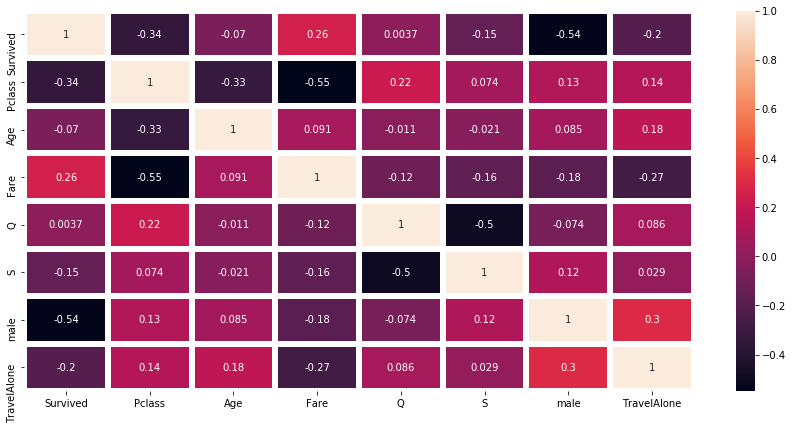

In [223]:
plt.figure(figsize=(15,7))
sns.heatmap(train_data.corr(), linewidths=5, annot=True)

<b>Let's interpret this.</b><br>

<b>Pclass has negative corelation with Survived. We have seen the relationship between survived and ticket classes. We saw that the number 3 ticket class was the most crowded and had the highest death rate. Therefore, it makes sense that the correlation is negative.(-0.34)</b><br>

<b>We see that there is high negative correlation between survived and male. We have seen the relationship between survived and sex before with histogram. The death rate of men was higher than women. Therefore, it is very reasonable to see a high negative correlation here.(-0.54)</b><br>

<b>Addition, relationship between fare and Pclass has negative correlation because the cheapest class is 3 also the most crowded class is 3.(-0.55)</b><br>

<b>1.0: positive correlation, when one attribute rises, the other attribute rises.</b><br>
<b>-1.0: negative correlation, when one attribute rises, the other attribute falls.</b><br>
<b>0.0: no correlation, two columns are not linearly related.</b>

In [224]:
X = train_data.drop('Survived', axis=1) #features
y = train_data['Survived'] #target

# Using Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score

<b>The data we use is split into training data and test data. The training set contains a known output and the model then learns this data. After learning, model generalizes other data accordingly. We have the test dataset (or subset) in order to test our model’s prediction on this subset.</b><br><br>
<b>We use the train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. So 80/20. (80% training set, 20% test set)</b>

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<b>Now we move on to the normalization section.</b><br>
<b>We use the StandardScaler () function of the Sklearn library to normalize the data.</b><br>
<b>Thanks to this function, we add bias to the data.</b>

In [227]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [228]:
logreg = LogisticRegression() #apply the model
logreg.fit(X_train_sc, y_train) #training

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<b>After the model is trained, we use predict () to estimate the class of a new data set (test set).</b>

In [229]:
prediction_lg = logreg.predict(X_test_sc)

print(classification_report(y_test, prediction_lg))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



[[92 18]
 [18 51]]
0.8


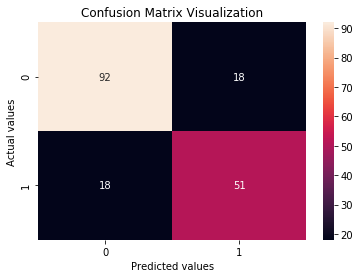

In [230]:
accuracy_lg = round(accuracy_score(y_test, prediction_lg), 2)
f1_score_lg = f1_score(y_test, prediction_lg, average="macro")
precision_lg = precision_score(y_test, prediction_lg, average="macro")
recall_lg = recall_score(y_test, prediction_lg, average="macro")
print(confusion_matrix(y_test, prediction_lg))
print(accuracy_lg)

import seaborn as sns
import matplotlib.pyplot as plt 
sns.heatmap(confusion_matrix(y_test, prediction_lg), annot=True, cbar=True)
plt.ylabel("Actual values")
plt.xlabel("Predicted values")
plt.title("Confusion Matrix Visualization")
plt.show()

## ROC Curve and AUC for Logistic Regression

In [231]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [232]:
lgr_scores = logreg.predict_proba(X_test_sc)
lgr_scores = lgr_scores[:,1]

In [233]:
false_positive, true_positive, thresholds = roc_curve(y_test, lgr_scores)

In [234]:
def plot_roc_curve(false_positive, true_positive, label=None):
    plt.plot(false_positive, true_positive, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

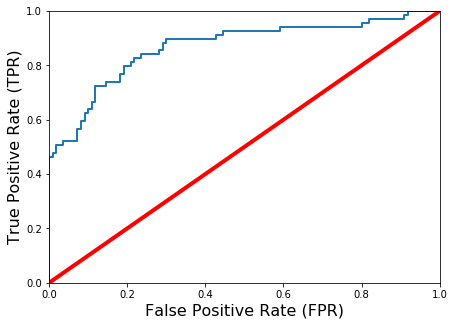

In [235]:
plt.figure(figsize=(7, 5))
plot_roc_curve(false_positive, true_positive)

In [236]:
auc_lgr = roc_auc_score(y_test, lgr_scores)
print("ROC-AUC Score:", auc_lgr)

ROC-AUC Score: 0.8686429512516469


# Using K-Nearest Neighbors

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,precision_score,recall_score

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [239]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test) 

In [240]:
knn = KNeighborsClassifier() #apply the model
knn.fit(X_train_sc, y_train) #training

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [241]:
prediction_knn = knn.predict(X_test_sc)

In [242]:
accuracy_knn = round(accuracy_score(y_test, prediction_knn), 2)
f1_score_knn = f1_score(y_test, prediction_knn, average="macro")
recall_knn = recall_score(y_test, prediction_knn, average="macro")
precision_knn = precision_score(y_test, prediction_knn, average="macro")
print(classification_report(y_test, prediction_knn))
print(confusion_matrix(y_test, prediction_knn))
print(accuracy_knn)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

[[97 13]
 [20 49]]
0.82


## ROC Curve and AUC for KNN

In [243]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [244]:
knn_scores = knn.predict_proba(X_test_sc)
knn_scores = knn_scores[:,1]

In [245]:
false_positive, true_positive, thresholds = roc_curve(y_test, knn_scores)

In [246]:
def plot_roc_curve(false_positive, true_positive, label=None):
    plt.plot(false_positive, true_positive, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

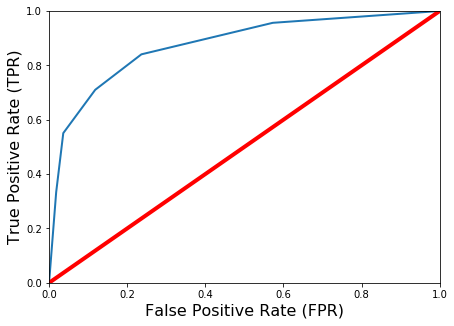

In [247]:
plt.figure(figsize=(7, 5))
plot_roc_curve(false_positive, true_positive)

In [248]:
auc_knn = roc_auc_score(y_test, knn_scores)
print("ROC-AUC Score:", auc_knn)

ROC-AUC Score: 0.874505928853755


# Using Random Forest

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<b>We don't need scaling in Random Forest. However, I observed a better result when we scaled. No need, but I will.</b>

In [252]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test) 

<b>n_estimators: number of trees in the forest.</b><br>
<b>This parameter is used to determine the number of trees to be used in the process.</b>

In [253]:
random_forest = RandomForestClassifier(n_estimators=100) #apply the model
random_forest.fit(X_train_sc, y_train) #training

prediction_rf = random_forest.predict(X_test_sc)
print(classification_report(y_test, prediction_rf))

accuracy_rf = round(accuracy_score(y_test, prediction_rf), 2)

print(confusion_matrix(y_test, prediction_rf))
print(accuracy_rf)
f1_score_rf = f1_score(y_test, prediction_rf, average="macro")
precision_rf = precision_score(y_test, prediction_rf, average="macro")
recall_rf = recall_score(y_test, prediction_rf, average="macro")

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

[[100  10]
 [ 18  51]]
0.84


## ROC Curve and AUC for Random Forest

In [254]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [255]:
rf_scores = random_forest.predict_proba(X_test_sc)
rf_scores = rf_scores[:,1]

In [256]:
false_positive, true_positive, thresholds = roc_curve(y_test, rf_scores)

In [257]:
def plot_roc_curve(false_positive, true_positive, label=None):
    plt.plot(false_positive, true_positive, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

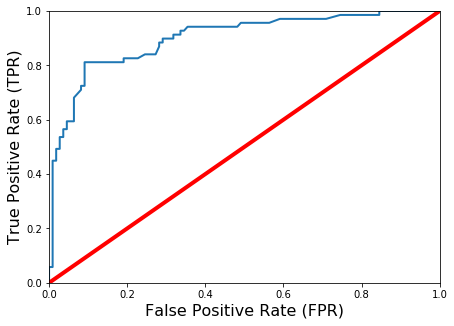

In [258]:
plt.figure(figsize=(7, 5))
plot_roc_curve(false_positive, true_positive)

In [259]:
auc_rf = roc_auc_score(y_test, rf_scores)
print("ROC-AUC Score:", auc_rf)

ROC-AUC Score: 0.9000658761528327


# Using Support-Vector Machine 

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score,recall_score

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [262]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [263]:
svm = SVC(probability=True) #apply the model
svm.fit(X_train_sc, y_train) #training

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [264]:
prediction_svm = svm.predict(X_test_sc)

In [265]:
accuracy_svm = round(accuracy_score(y_test, prediction_svm), 2)
f1_score_svm = f1_score(y_test, prediction_svm, average="macro")
precision_svm = precision_score(y_test, prediction_svm, average="macro")
recall_svm = recall_score(y_test, prediction_svm, average="macro")

In [266]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_svm))
print(confusion_matrix(y_test, prediction_svm))
print(accuracy_svm)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       110
           1       0.87      0.65      0.74        69

    accuracy                           0.83       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.83      0.83      0.82       179

[[103   7]
 [ 24  45]]
0.83


## ROC Curve and AUC for SVM

In [267]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [268]:
svm_scores = svm.predict_proba(X_test_sc)
svm_scores = svm_scores[:,1]

In [269]:
false_positive, true_positive, thresholds = roc_curve(y_test, svm_scores)

In [270]:
def plot_roc_curve(false_positive, true_positive, label=None):
    plt.plot(false_positive, true_positive, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

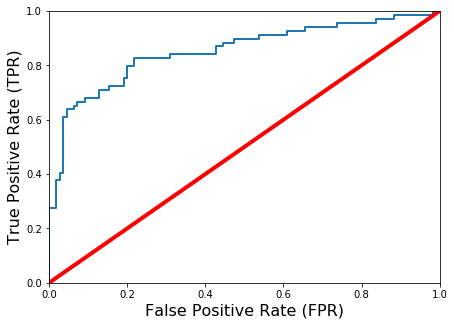

In [271]:
plt.figure(figsize=(7, 5))
plot_roc_curve(false_positive, true_positive)

In [272]:
auc_svm = roc_auc_score(y_test, svm_scores)
print("ROC-AUC Score:", auc_svm)

ROC-AUC Score: 0.8528326745718051


# Comparison Part

In [273]:
from sklearn import metrics 

compare_models = pd.DataFrame( 
    {  'Model' : ['LogReg','KNN','RanForest','SVM'], 
       'Accuracy' : [accuracy_lg,accuracy_knn,accuracy_rf,accuracy_svm], 
       'F1-Score' : [f1_score_lg,f1_score_knn,f1_score_rf,f1_score_svm],
       'Precision': [precision_lg,precision_knn,precision_rf,precision_svm],
       'Recall' : [recall_lg,recall_knn,recall_rf,recall_svm],
        'AUC'  : [auc_lgr,auc_knn,auc_rf,auc_svm]
     
    }) 

result = compare_models.sort_values(by='Accuracy', ascending=False)
result = result.set_index('Accuracy')  
print(result)

              Model  F1-Score  Precision    Recall       AUC
Accuracy                                                    
0.84      RanForest  0.830904   0.841762  0.824111  0.900066
0.83            SVM  0.806500   0.838204  0.794269  0.852833
0.82            KNN  0.801359   0.809691  0.795982  0.874506
0.80         LogReg  0.787747   0.787747  0.787747  0.868643
